# Numerische Integration mit dem Euler-Cauchy Polygonzugverfahren Verfahren und dem Runge-Kutta Verfahren

In diesem Beispiel geht es um die numerische Integration des Einmassenschwingers mit der Gleichung

$$ m \ \ddot x + b\ \dot x + c\ x = 0 \quad .$$

## Überführung in Systeme erster Ordnung
Die Gleichung ist zweiter Ordnung (zu erkennen an der zweiten Zeitableitung der Ortskoordinate $x$). Wir zerlegen die Gleichung in ein System zweier Gleichungen erster Ordnung durch die Substitution $x = x_0$:

$$ \dot x_0 = x_1$$
und 
$$m\ \dot x_1 + b\ x_1 + c\ x_0 = 0 \quad .$$
Wir bringen diese Gleichungen noch in die Normalform (das macht es später etwas übersichtlicher):
$$ \dot x_0 = x_1$$
und 
$$\dot x_1 =  -\frac{b}{m}\ x_1 - \frac{c}{m}\ x_0 \quad .$$
## Anfangswerte
Als Anfangswerte benötigen wir zwei Werte, für jede Gleichung einen. Wir wählen:
$$ x_0(t=0) = 1$$
und 
$$ x_1(t=0) = 0$$

## Analytische Lösung
Bekanntlich lässt sich die oben beschriebene DLG auch analytisch lösen. Wir nutzen die Lösung hier als mathematisch exakte Referenz (im Vergleich zu den approximativen Näherungsverfahren) um die Qualität verschiedener Verfahren vergleichen zu können. Die Lösung ist: 
$$ x(t) = \hat x \ e^{-\omega_0 \ D \ t} \ e^{j \omega_0 \sqrt{1-D^2}t}$$

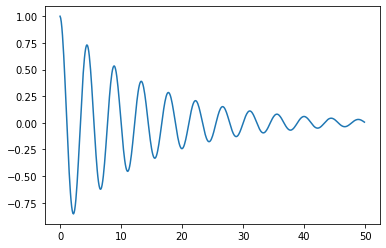

In [2]:
import numpy as np
tmax = 50
t_exact = np.arange(0, tmax, .1)
# set parameters
D = .05
c = 2
m = 1
b = D*2*m*np.sqrt(c/m)
x0 = 1
omega0 = np.sqrt(c/m)
x_exact =np.real( x0 * np.exp(-omega0 * D * t_exact) * np.exp(1.j * omega0 * np.sqrt(1-D**2) * t_exact))

import matplotlib.pyplot as plt
plt.plot(t_exact,x_exact)
plt.show()

## Numerische Lösung mit dem Euler-Cauchy-Polygonzugverfahren
Allgemein lässt sich eine DGL erster Ordnung schreiben als:
$$ y^\prime = f(x, y(x))$$ 
Die Ableitung ist also identisch mit dem auf der rechten Seite verbleibenden Term. 
Mit einem einfachen Sekanten-Ansatz lässt sich so ein einfaches Näherungsverfahren konstruieren:
$$y_{i+1} = y_{i} + h \ y^\prime$$
Ausgehend von einem bekannten Funktionswert $y_{i}$ lässt sich also der nächste Funktionswert nach einer Schrittweite $h$ einfach mit der aktuellen Steigung berechnen. Das Tolle: die Steigung steht auf der rechten Seite der Normalform!

In [ ]:
# Integrate using Euler-Cauchy's Method

# step width h
h = .001

# generate a time vector
t_euler = np.arange(0,tmax+h,h)

# generate solution vectors
x0 = np.zeros(len(t_euler))
x1 = np.zeros(len(t_euler))

# set initial values
x0[0] = 1
x1[0] = 0

# integrate the system!
for i in range(len(t_euler)-1):
    x0[i+1] = x0[i] + h * x1[i]
    x1[i+1] = x1[i] + h * (-b/m * x1[i] - c/m * x0[i]) 

plt.plot(t_exact, x_exact, label = 'analytisch')
plt.plot(t_euler, x0, label = 'Euler')
plt.legend()
plt.show()

In [ ]:
# Integrate using Runge-Kutta Method

def ems(t,y):
    dy = np.zeros(2)
    dy[0] = y[1]
    dy[1] = -b/m * y[1] - c/m * y[0]
    return dy

import scipy.integrate as integrator
y0 = np.array([1, 0])
result = integrator.solve_ivp(ems, [0, tmax], y0, 'RK23', first_step = .01)
disp = result.y[0]
# generate a fitting time vector
t_rk45 = np.linspace(0, tmax, len(disp))

plt.plot(t_exact, x_exact, label = 'analytisch')
plt.plot(t_euler, x0, label = 'Euler')
plt.plot(t_rk45, disp, label = 'RK45')
plt.legend()
plt.show()

In [ ]:
# function calls
print(len(x0))
print(len(disp))